# MNIST with Classic Machine Learning

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


# Dataset Description
32x32 bitmaps (binary images) are divided into non-overlapping blocks of 4x4. The amount of pixels on each block is counted (at max 16) and the results is the new pixels value.

We end up with a 8x8 image, where each pixel is an integer between 0 and 16. No missing values on the dataset.
$$
32 / 4 = 8
$$


In [135]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = digits.data.features
y = digits.data.targets

# variable information
print(digits.variables)

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

In [136]:
y.head(10)

,class
0,0
1,0
2,7
3,4
4,6
5,2
6,5
7,5
8,0
9,8


In [137]:
X.head(10)
#intensity of each pixel

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
5,0,0,11,16,10,1,0,0,0,4,...,8,3,0,0,10,16,16,16,16,6
6,0,0,1,11,13,11,7,0,0,0,...,0,0,0,0,1,13,5,0,0,0
7,0,0,8,10,8,7,2,0,0,1,...,0,0,0,0,4,13,8,0,0,0
8,0,0,15,2,14,13,2,0,0,0,...,0,0,0,0,10,12,5,0,0,0
9,0,0,3,13,13,2,0,0,0,6,...,12,0,0,0,3,15,11,6,0,0


(-0.5, 7.5, 7.5, -0.5)

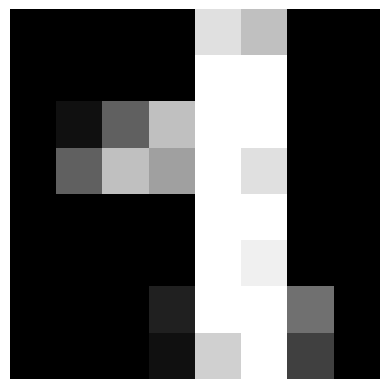

In [138]:
plt.imshow(X.values[567].reshape(8, 8), cmap='gray')
plt.axis('off')

In [139]:
def image_iterator(X, label=None, head=None):
    limit = head if head is not None else len(X)

    for i in range(limit):
        image = X.values[i].reshape(8, 8)
        if label is not None:
            yield image, label.values[i]
        else:
            yield image, None

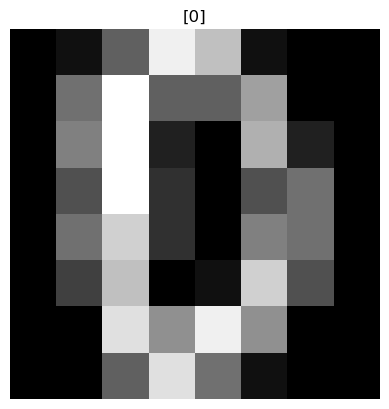

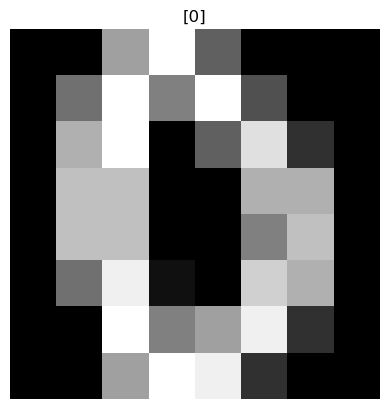

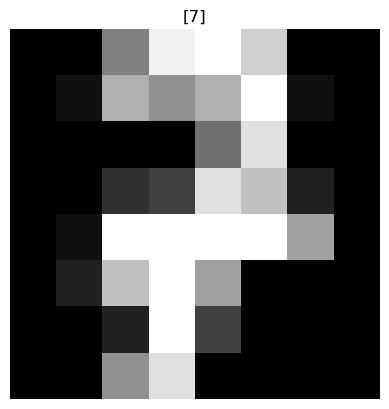

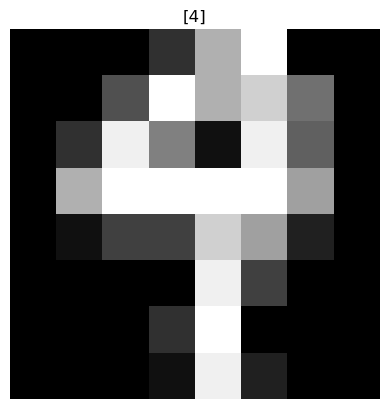

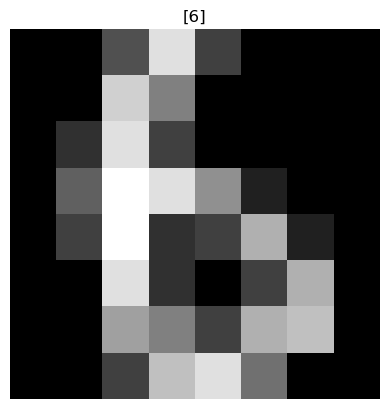

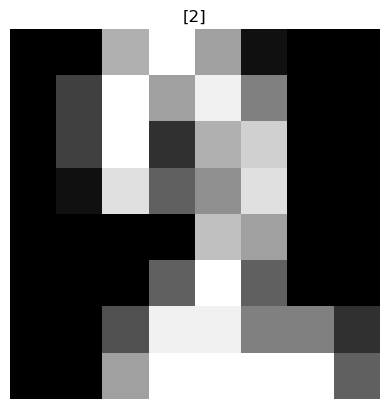

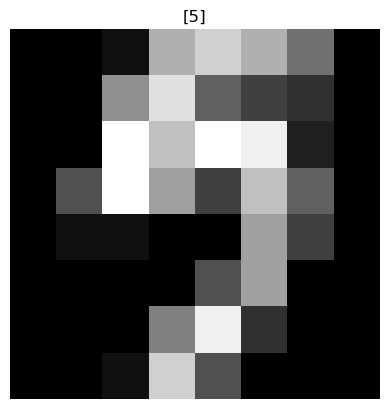

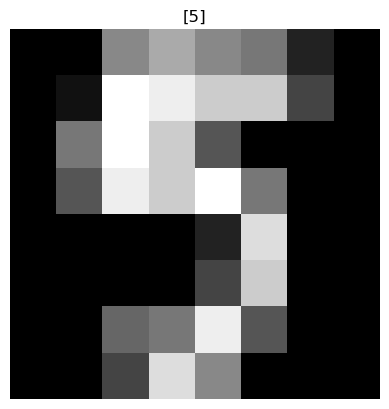

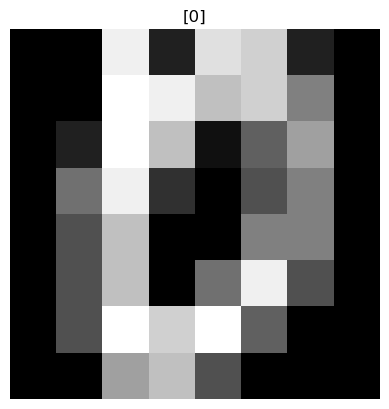

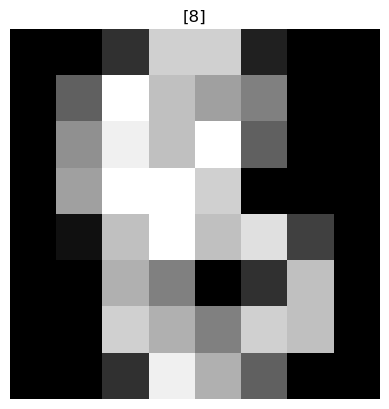

In [140]:
for image, label in image_iterator(X, y, head=10):
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

In [141]:
X.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,3.737900,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,4.906909,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,16.000000,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


Now we will plot the distribution of classes in our dataset:

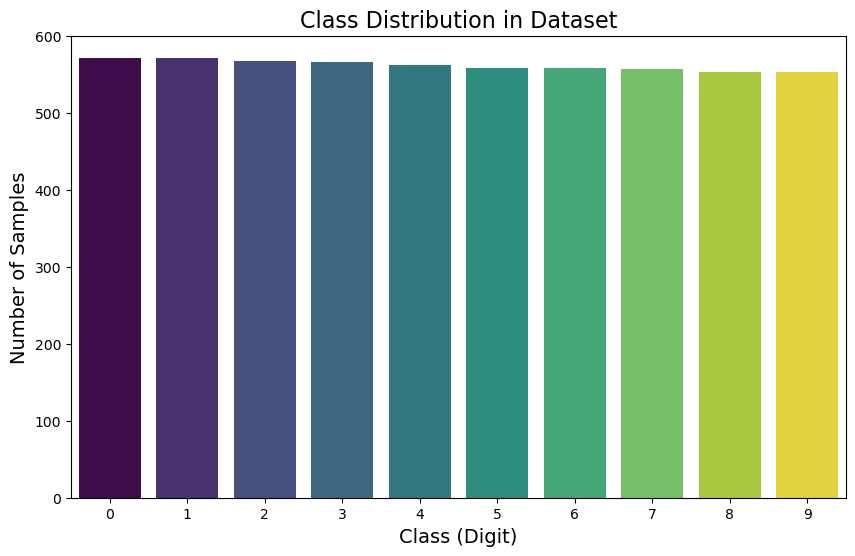

In [142]:
class_counts = y.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts, hue=np.arange(len(class_counts)), palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Class (Digit)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Class Distribution in Dataset', fontsize=16)

# Show the plot
plt.show()

All classes are equally distributed in our dataset which is a really good sign.

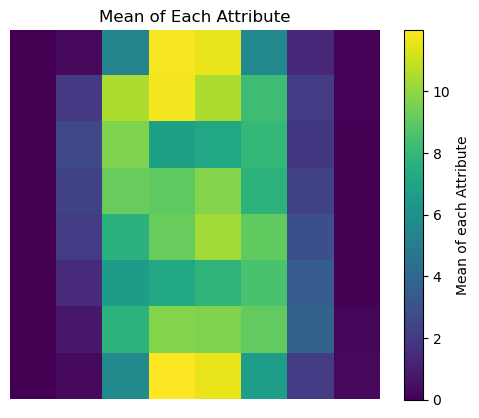

In [143]:
# prompt: mean of each attribute in the dataframe displayed on an 8x8 matrix

import matplotlib.pyplot as plt

means = X.mean()

mean_matrix = means.values.reshape(8, 8)

plt.imshow(mean_matrix)
plt.title('Mean of Each Attribute')
plt.axis('off')
plt.colorbar(label='Mean of each Attribute')
plt.show()

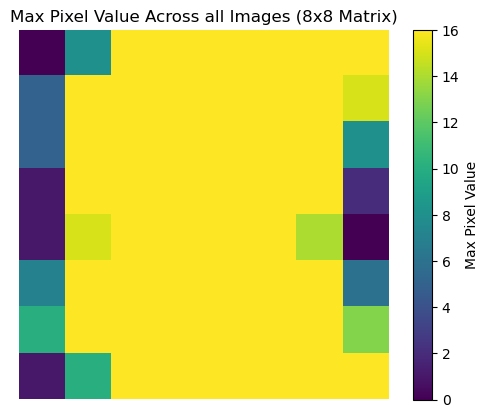

In [144]:
max_values = X.max()

max_matrix = max_values.values.reshape(8, 8)

plt.imshow(max_matrix)
plt.colorbar(label='Max Pixel Value')  # Add a colorbar with a label
plt.title('Max Pixel Value Across all Images (8x8 Matrix)')
plt.axis('off') # Hide the axis ticks and labels
plt.show()

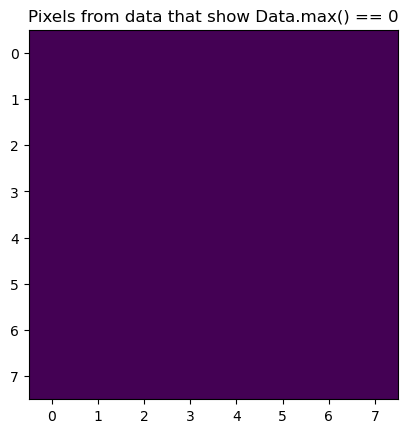

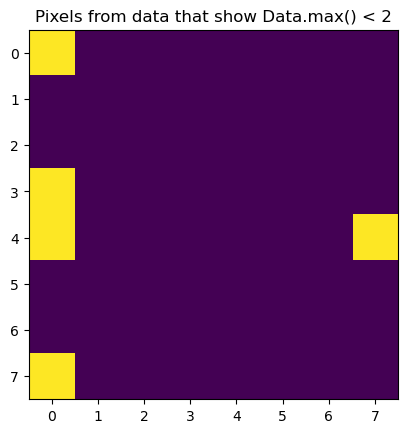

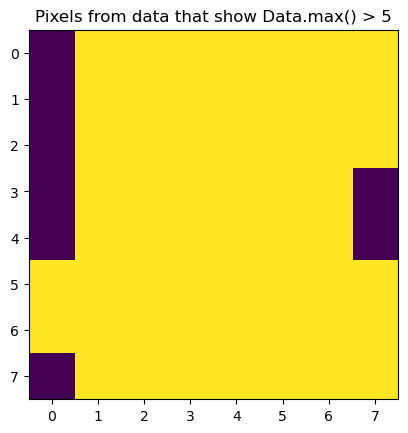

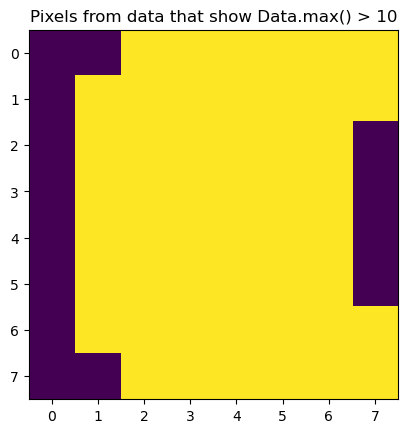

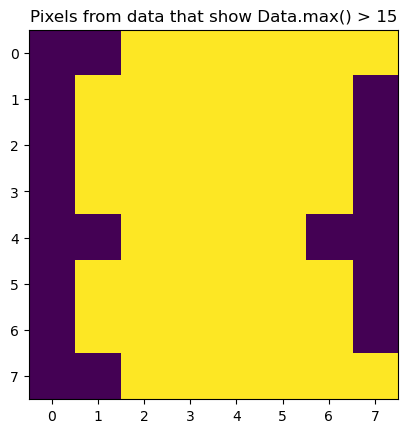

In [145]:
def get_stat_df(data: pd.DataFrame, condition, str_condition):
    zero_max_attributes = data.columns[condition]

    coord_zero_max_attributes = []
    matrix_zero_max_attributes = np.zeros((8, 8))

    for attribute in zero_max_attributes:

        num_attr = int(attribute[9:])
        coord_x = (num_attr - 1) % 8
        coord_y = (num_attr - 1) // 8

        matrix_zero_max_attributes[coord_y][coord_x] = 1

    plt.title(f'Pixels from data that show {str_condition}')
    plt.imshow(matrix_zero_max_attributes)
    plt.show()

get_stat_df(X, X.min() == 0, 'Data.max() == 0')
get_stat_df(X, X.max() < 2, 'Data.max() < 2')
get_stat_df(X, X.max() > 5, 'Data.max() > 5')
get_stat_df(X, X.max() > 10, 'Data.max() > 10')
get_stat_df(X, X.max() > 15, 'Data.max() > 15')

Binary matrix (get_staff_df), the matrix matrix_zero_max_attributes contains only values 0 or 1.

0 represents pixels that do not meet the specified condition.

1 represents pixels that do meet the condition.

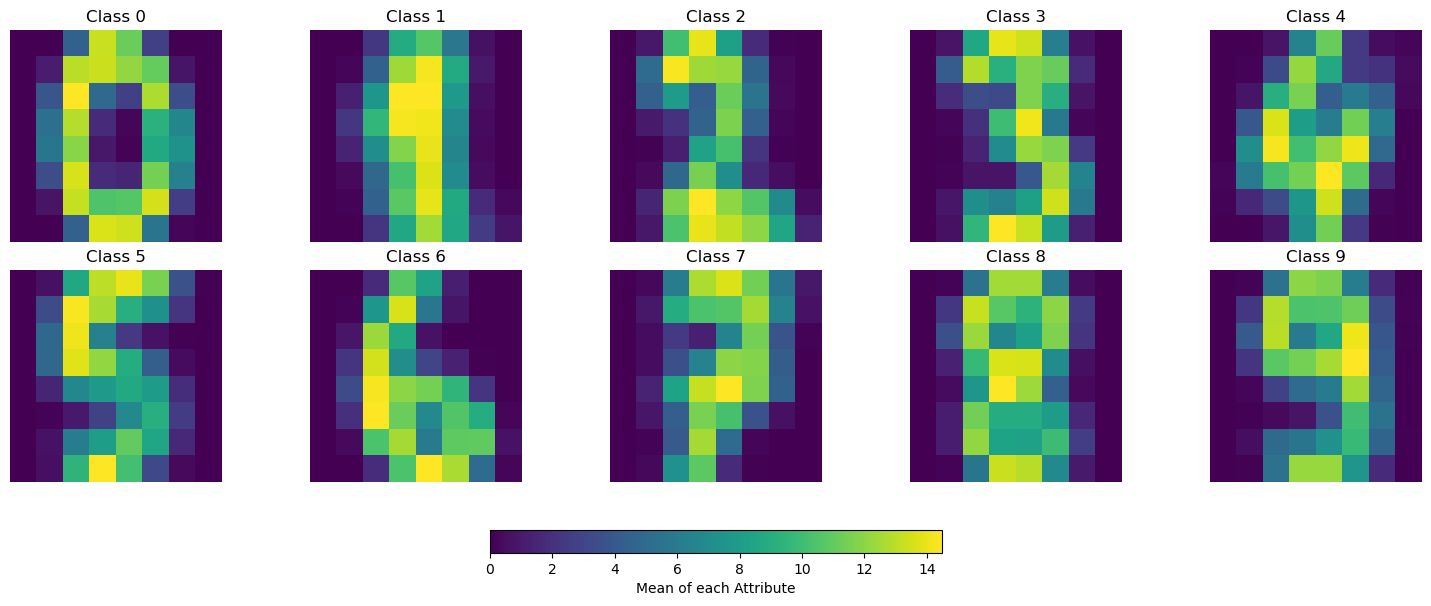

In [146]:
n_classes = 10

rows, cols = 2, 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 6), constrained_layout=True)

for specific_class in range(n_classes):
    row, col = divmod(specific_class, cols)
    ax = axes[row, col]

    X_class = X[y['class'] == specific_class]
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    im = ax.imshow(mean_matrix_class, cmap='viridis')
    ax.set_title(f'Class {specific_class}')
    ax.axis('off')

cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Mean of each Attribute')

plt.show()


In [147]:
def entropy(vector):

  # convert vector into a proability distribution
  total = np.sum(vector)
  probabilities = vector/total

  #calculate entropy
  entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))

  return entropy

Let's compute the entopy for the first 10 digits:



In [148]:
entropies = []

for index, row in X.iterrows():
  entropy_value = entropy(row.values)
  entropies.append(entropy_value)

for x in range(10):
  print(f"entropy for digit {x}: {entropies[x]}")

entropy for digit 0: 4.9724476219786595
entropy for digit 1: 4.987248868896388
entropy for digit 2: 4.7289441942799275
entropy for digit 3: 4.7370580960152076
entropy for digit 4: 4.771052834216457
entropy for digit 5: 4.979596715934461
entropy for digit 6: 4.747802083348315
entropy for digit 7: 4.762383211766675
entropy for digit 8: 5.045463617754645
entropy for digit 9: 5.053755616923365


**Higher entropy** indicates that the pixel intensity values are **more diverse or spread out**, meaning the image contains more "information" or variation in pixel values.

**Lower entropy** suggests that the pixel intensities are **more uniform or concentrated**, meaning less variation or simpler patterns in the image.

Entropy for class 0: 5.103286181320728
Entropy for class 1: 5.094401567338966
Entropy for class 2: 5.108824429162066
Entropy for class 3: 5.097617573647973
Entropy for class 4: 5.168797859879941
Entropy for class 5: 5.156467515545947
Entropy for class 6: 5.019417335124263
Entropy for class 7: 5.085701635820718
Entropy for class 8: 5.197970863766271
Entropy for class 9: 5.215149935248112


Text(0.5, 1.0, 'Entropy for Each Class')

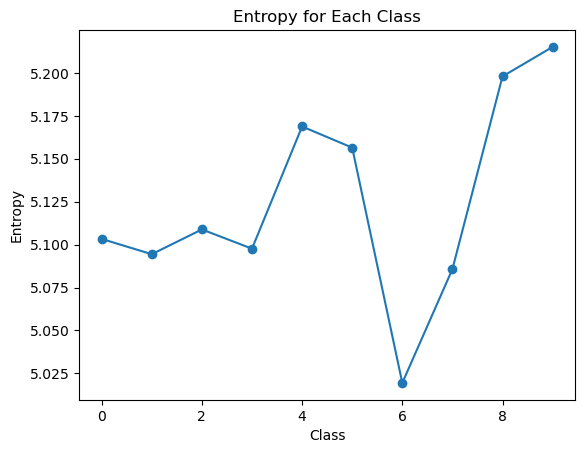

In [149]:
entropies = []

for specific_class in range(10):
    X_class = X[y['class'] == specific_class]
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)
    entropy_value = entropy(mean_matrix_class.flatten())
    entropies.append(entropy_value)

    print(f'Entropy for class {specific_class}: {entropy(mean_matrix_class.flatten())}')

plt.plot(entropies, marker='o')
plt.xlabel('Class')
plt.ylabel('Entropy')
plt.title('Entropy for Each Class')

Entropy for class 0: 5.340590199490972
Entropy for class 1: 5.478107854456125
Entropy for class 2: 5.542513137486109
Entropy for class 3: 5.518341377563534
Entropy for class 4: 5.65557583274458
Entropy for class 5: 5.530334261551102
Entropy for class 6: 5.374531931510241
Entropy for class 7: 5.459408609570276
Entropy for class 8: 5.462479823108589
Entropy for class 9: 5.547891095761255


Text(0.5, 1.0, 'Entropy for Each Class (Nonzero Values)')

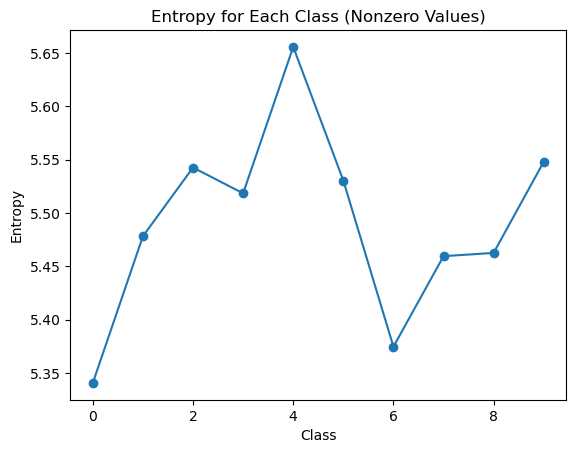

In [150]:
entropies_nonzero = []
for specific_class in range(10):
    X_class = X[y['class'] == specific_class]
    nonzero = X_class[X > 0]
    entropy_value = entropy(nonzero.mean())
    entropies_nonzero.append(entropy_value)

    print(f'Entropy for class {specific_class}: {entropy_value}')

plt.plot(entropies_nonzero, marker='o')
plt.xlabel('Class')
plt.ylabel('Entropy')
plt.title('Entropy for Each Class (Nonzero Values)')

Skewness for class 0: 0.12290207339777708
Skewness for class 1: 0.27716821840328565
Skewness for class 2: 0.353761008750632
Skewness for class 3: 0.377762411063036
Skewness for class 4: 0.47305748639565387
Skewness for class 5: 0.40247934313794886
Skewness for class 6: 0.21802379032010924
Skewness for class 7: 0.2953019025330024
Skewness for class 8: 0.016811635077020097
Skewness for class 9: 0.28058789324296046


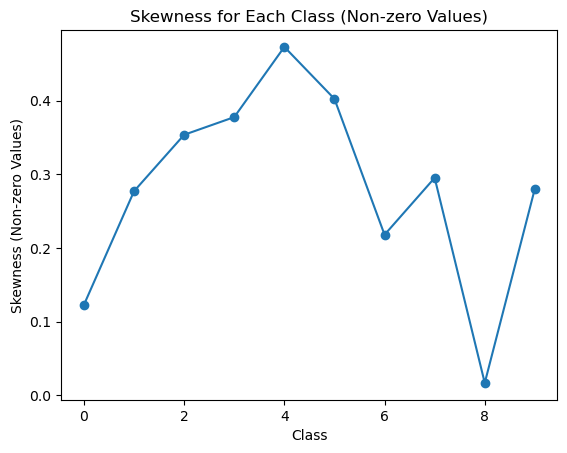

In [151]:
from scipy.stats import skew

# Define the skewness calculation function
def skewness_nonzero(vector):
    nonzero = vector[vector > 0]
    return skew(nonzero)

# List to store skewness values for each class
skewness_values = []

for specific_class in range(10):
    # Filter rows for the specific class
    X_class = X[y['class'] == specific_class]

    # Calculate the mean for the class
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    # Flatten the mean matrix and calculate skewness for non-zero values
    skewness_value = skewness_nonzero(mean_matrix_class.flatten())
    skewness_values.append(skewness_value)

    print(f'Skewness for class {specific_class}: {skewness_value}')

# Plot the skewness values
plt.plot(skewness_values, marker='o')
plt.xlabel('Class')
plt.ylabel('Skewness (Non-zero Values)')
plt.title('Skewness for Each Class (Non-zero Values)')
plt.show()

A positive **skew** indicates a few high values dominating the vector, which could correlate with sparsity and larger magnitudes.

High: Likely have a small number of very large values dominating the distribution of non-zero entries.

Low: Non-zero values are more evenly distributed or clustered around a typical range.

Skewness for class 0: 0.5487394951481452
Skewness for class 1: 0.5844419736309746
Skewness for class 2: 0.5784743054804072
Skewness for class 3: 0.6009324759892049
Skewness for class 4: 0.5875545139709131
Skewness for class 5: 0.6105418498893687
Skewness for class 6: 0.5750625040645608
Skewness for class 7: 0.6242103435711017
Skewness for class 8: 0.3507255372657296
Skewness for class 9: 0.5114992905701239


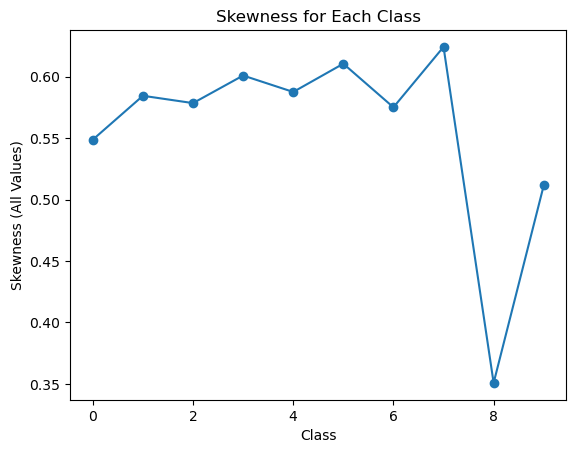

In [152]:
skewness_values = []

for specific_class in range(10):
    X_class = X[y['class'] == specific_class]

    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    skewness_value = skew(mean_matrix_class.flatten())
    skewness_values.append(skewness_value)

    print(f'Skewness for class {specific_class}: {skewness_value}')

# Plot the skewness values
plt.plot(skewness_values, marker='o')
plt.xlabel('Class')
plt.ylabel('Skewness (All Values)')
plt.title('Skewness for Each Class')
plt.show()

The low skewness on class 8 means that all of the features/pixels are more evenly distributed. The domination of the larger values is not as strong as on the other classes.

Skewness is useful for:

Understanding the asymmetry of the data (in this case, the digit images) and how the pixel values are distributed.

Detecting if a digit class has a distribution skewed towards lower or higher pixel values, which could help understand how those digits are visually formed.

Performing exploratory analysis to detect patterns and important characteristics before training machine learning models.



# Data Preprocessing

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(-0.5, 7.5, 7.5, -0.5)

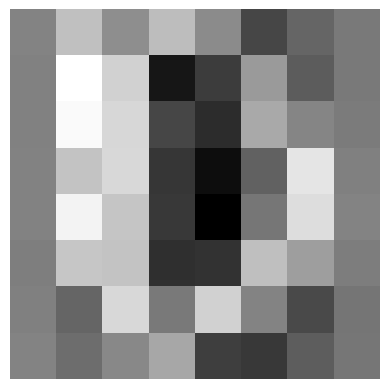

In [154]:
plt.imshow(X_scaled[0].reshape(8, 8), cmap='gray')
plt.axis('off')

(-0.5, 7.5, 7.5, -0.5)

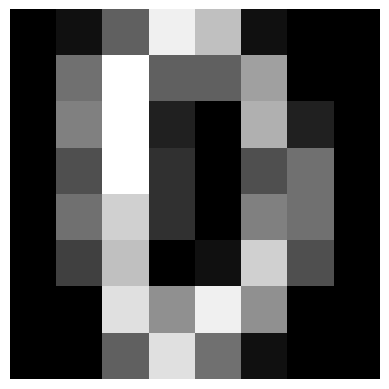

In [155]:
plt.imshow(scaler.inverse_transform(X_scaled)[0].reshape(8, 8), cmap='gray')
plt.axis('off')

In [180]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

(-0.5, 7.5, 7.5, -0.5)

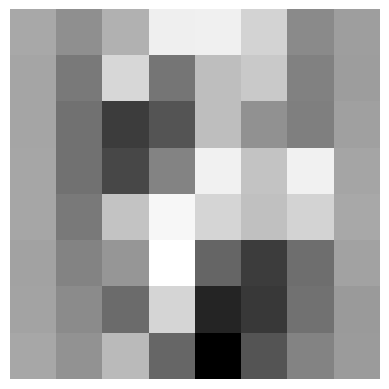

In [181]:
plt.imshow(X_test[0].reshape(8, 8), cmap='gray')
plt.axis('off')

# SVM Implementation

In [182]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [159]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9893238434163701
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.98      1.00      0.99       102
           2       1.00      0.99      1.00       107
           3       0.98      0.97      0.98       118
           4       0.97      0.99      0.98       117
           5       0.97      1.00      0.98        97
           6       0.99      0.99      0.99       123
           7       1.00      1.00      1.00       124
           8       0.99      0.98      0.99       105
           9       1.00      0.97      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124

Confusion Matrix:
 [[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   1   0   0   0   0   0]
 [  0   0   0 115   0   3   0   0   0   

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 9, 10, 11],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']#, 'linear', 'sigmoid', 'polynomial']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=10)
grid_search.fit(X_train, y_train['class'].to_numpy().ravel())

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 1/5; 1/15] END C=0.1, gamma=0.01, kernel=rbf;, score=0.952 total time=   0.3s
[CV 2/5; 1/15] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 2/5; 1/15] END C=0.1, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.2s
[CV 3/5; 1/15] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 3/5; 1/15] END C=0.1, gamma=0.01, kernel=rbf;, score=0.957 total time=   0.2s
[CV 4/5; 1/15] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 4/5; 1/15] END C=0.1, gamma=0.01, kernel=rbf;, score=0.953 total time=   0.2s
[CV 5/5; 1/15] START C=0.1, gamma=0.01, kernel=rbf..............................
[CV 5/5; 1/15] END C=0.1, gamma=0.01, kernel=rbf;, score=0.973 total time=   0.2s
[CV 1/5; 2/15] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/15] END C=0.1, gamma=0.1, kernel

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 9, 10, 11], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']},
             verbose=10)

In [161]:
print("Best Parameters:", grid_search.best_params_)

best_svm_model = grid_search.best_estimator_

y_pred_best = best_svm_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 9, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model Accuracy: 0.9911032028469751


# Applying PCA to check its effects

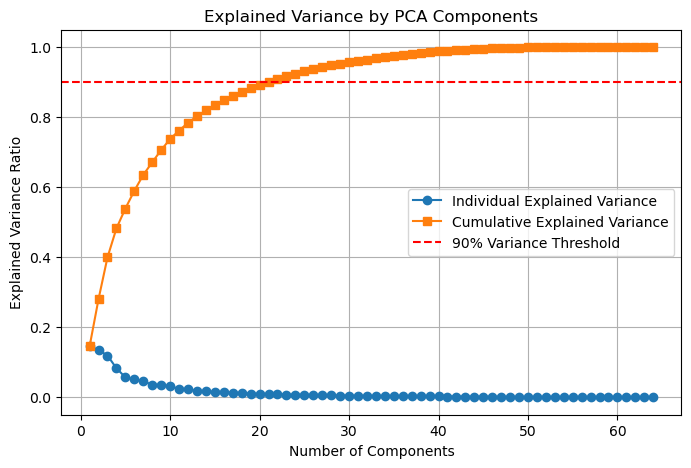

In [162]:
from sklearn.decomposition import PCA

X_copy = X.copy()

pca = PCA()
pca.fit(X_copy)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))

# Plot individual explained variance
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    label='Individual Explained Variance',
)

# Plot cumulative explained variance
plt.plot(
    range(1, len(cumulative_variance_ratio) + 1),
    cumulative_variance_ratio,
    marker='s',
    label='Cumulative Explained Variance',
)

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

In [163]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_copy, y, test_size=0.2, random_state=42)

pca.fit_transform(X_train_pca)
pca.fit_transform(X_test_pca).shape

(1124, 64)

In [164]:
svm_model_pca = SVC(kernel='rbf', random_state=42)

svm_model_pca.fit(X_train_pca, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

In [165]:
y_pred_pca = svm_model_pca.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred))

Accuracy: 0.9902135231316725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.98      1.00      0.99       102
           2       1.00      0.99      1.00       107
           3       0.98      0.97      0.98       118
           4       0.97      0.99      0.98       117
           5       0.97      1.00      0.98        97
           6       0.99      0.99      0.99       123
           7       1.00      1.00      1.00       124
           8       0.99      0.98      0.99       105
           9       1.00      0.97      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124

Confusion Matrix:
 [[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 106   0   1   0   0   0   0   0]
 [  0   0   0 115   0   3   0   0   0   

- [ ] Mirar los puntos en los que falla el pca en la confusion matrix y porque falla

In [166]:
conf_matrix = confusion_matrix(y_test_pca, y_pred_pca)

rows, cols = conf_matrix.shape
wrong_classifications = []

for i in range(rows):
    for j in range(cols):
        if i != j and conf_matrix[i, j] > 0:
            wrong_classifications.append((i, j, conf_matrix[i, j]))

# Mostrar las clasificaciones incorrectas
print("Errores en la matriz de confusión:")
for i, j, count in wrong_classifications:
    print(f"Row: {i}, Column: {j}, Value: {count}")

Errores en la matriz de confusión:
Row: 0, Column: 4, Value: 1
Row: 3, Column: 5, Value: 3
Row: 4, Column: 6, Value: 1
Row: 5, Column: 3, Value: 1
Row: 6, Column: 1, Value: 1
Row: 9, Column: 3, Value: 2
Row: 9, Column: 5, Value: 1
Row: 9, Column: 8, Value: 1


Total errors: 11
True class: 0, Predicted class: 4, Count: 1
True class: 3, Predicted class: 5, Count: 3


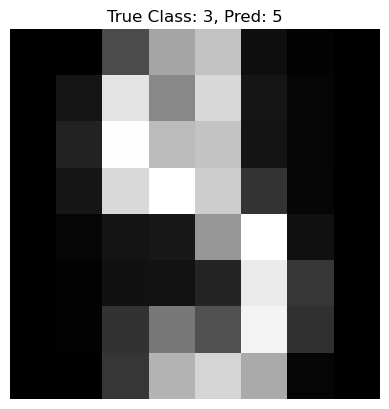

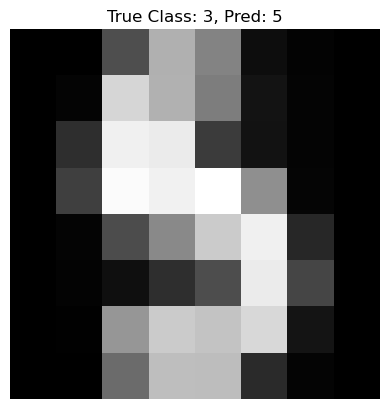

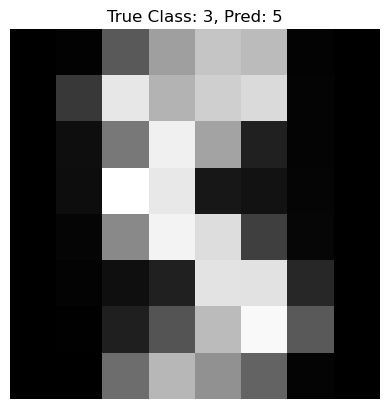

True class: 4, Predicted class: 6, Count: 1


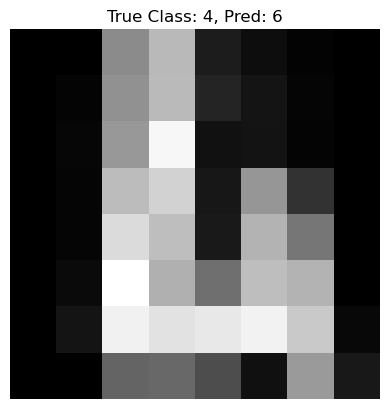

True class: 5, Predicted class: 3, Count: 1
True class: 6, Predicted class: 1, Count: 1


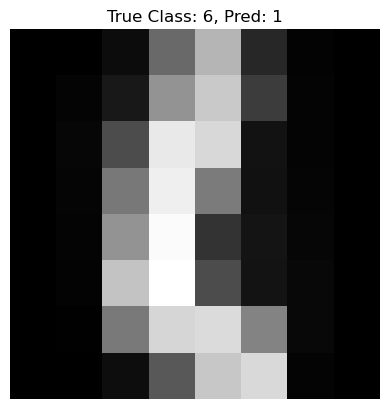

True class: 9, Predicted class: 3, Count: 2


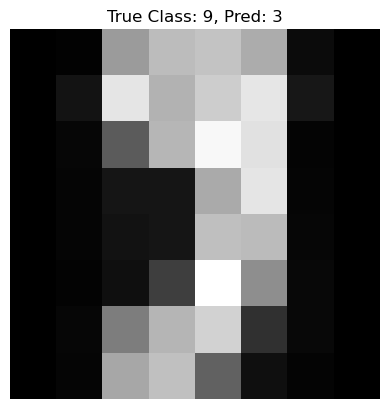

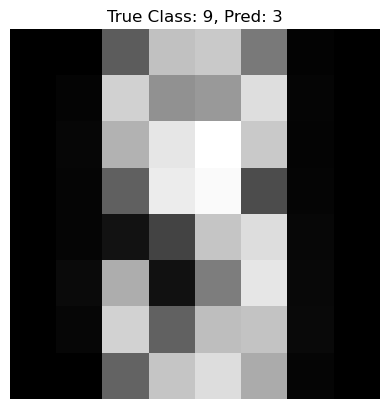

True class: 9, Predicted class: 5, Count: 1
True class: 9, Predicted class: 8, Count: 1


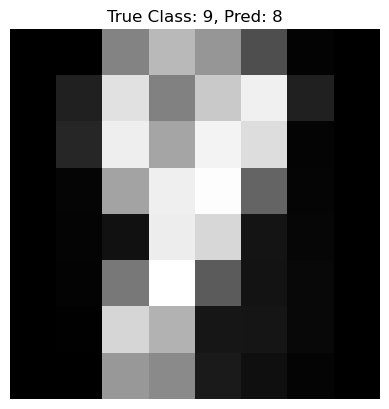

In [167]:
y_test_pca = np.array(y_test_pca)
y_pred_pca = np.array(y_pred_pca)

print(f"Total errors: {sum([wc[2] for wc in wrong_classifications])}")

X_test = scaler.inverse_transform(X_test_pca)

for true_class, pred_class, count in wrong_classifications:
    print(f"True class: {true_class}, Predicted class: {pred_class}, Count: {count}")

    """
    PODEMOS USAR ESTE FOR Y IF, O
    error_indices = np.where((y_test_pca == true_class) & (y_pred == pred_class))[0]
    for idx in error_indices[:count]:  # Limitar la visualización a 'count' ejemplos de cada error
        plt.figure(figsize=(4, 2))

    Y quitando lo del count y break del final
    """

    # Encuentra los índices de los errores específicos
    for idx in range(len(y_test_pca)):
        if y_test_pca[idx] == true_class and y_pred[idx] == pred_class:

            plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
            plt.title(f"True Class: {true_class}, Pred: {pred_class}")
            plt.axis('off')

            plt.show()

            count -= 1
            if count <= 0:
                break

(-0.5, 7.5, 7.5, -0.5)

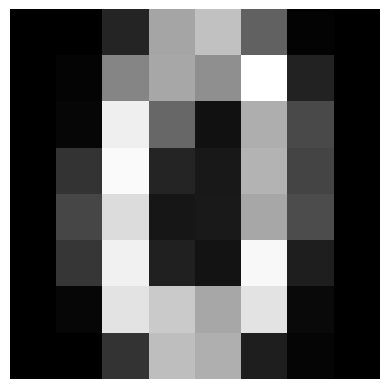

In [168]:
plt.imshow(X_test[1].reshape(8, 8), cmap='gray')
plt.axis('off')

In [169]:
y_test_pca = np.ravel(y_test_pca)
y_pred = np.ravel(y_pred)
corrected_y_pred = y_pred.copy()  # Copy the predictions
errors = np.where(y_test_pca != y_pred)[0]  # Find the indices of incorrect predictions
corrected_y_pred[errors] = y_test_pca[errors]  # Replace incorrect predictions with true labels

# Recalculate the confusion matrix
corrected_conf_matrix = confusion_matrix(y_test_pca, corrected_y_pred)


print("Corrected Confusion Matrix:")
print(corrected_conf_matrix)

Corrected Confusion Matrix:
[[108   0   0   0   0   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0]
 [  0   0   0 118   0   0   0   0   0   0]
 [  0   0   0   0 117   0   0   0   0   0]
 [  0   0   0   0   0  97   0   0   0   0]
 [  0   0   0   0   0   0 123   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 105   0]
 [  0   0   0   0   0   0   0   0   0 123]]


# Image Augmentation

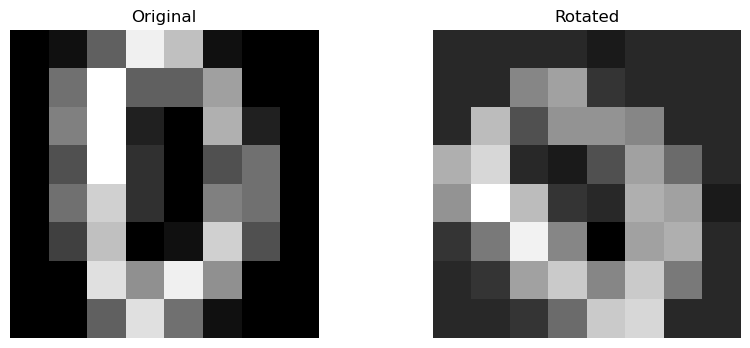

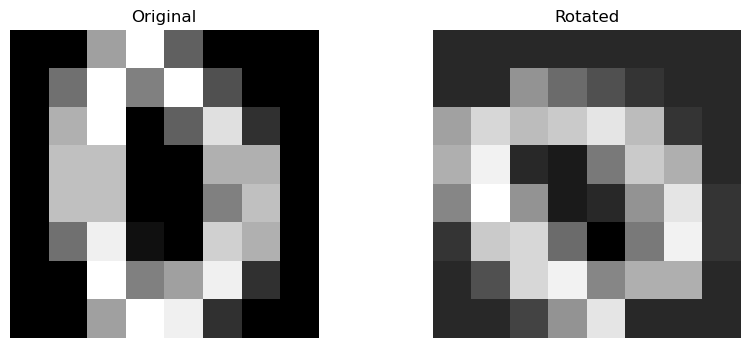

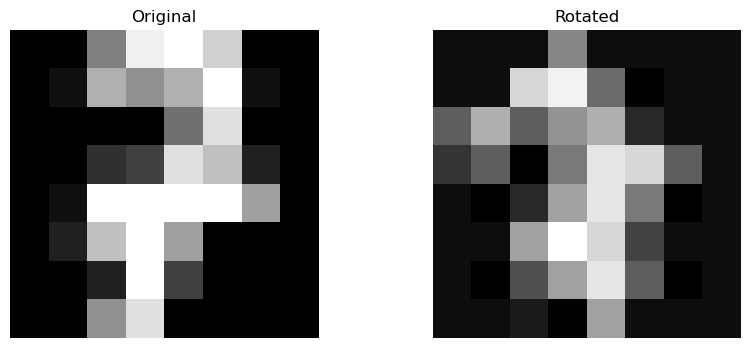

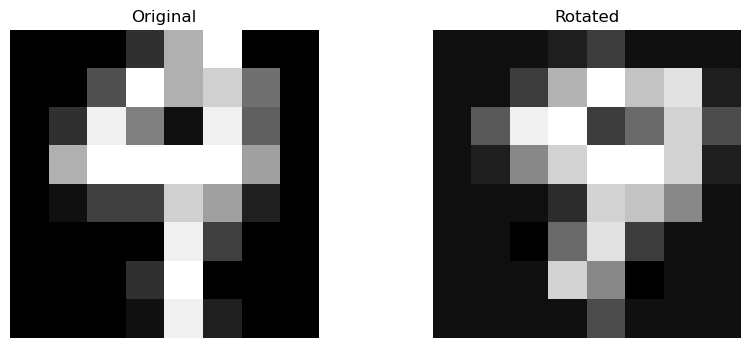

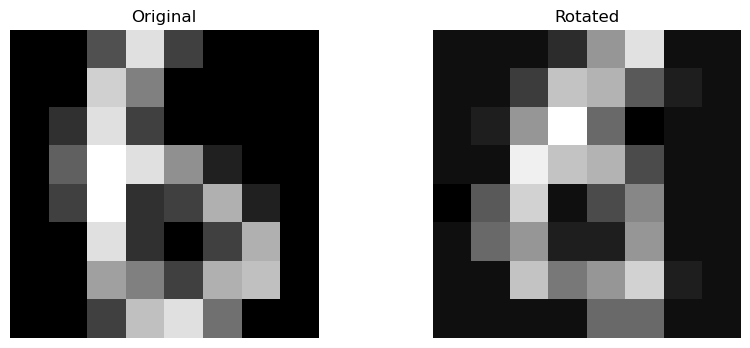

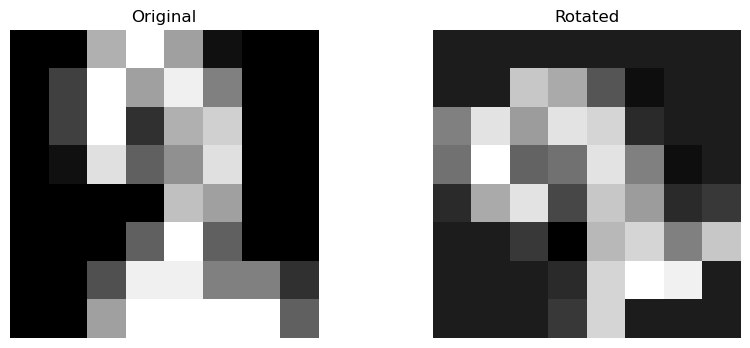

In [170]:
import numpy as np
from scipy.ndimage import affine_transform

def rotate_image(data, angle):

    # Convert angle from degrees to radians
    theta = np.radians(angle)

    # Rotation matrix (for counterclockwise rotation)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Compute the offset to keep the image centered
    center = np.array(data.shape) / 2
    offset = center - center @ rotation_matrix

    # Use affine_transform to rotate the image
    rotated_data = affine_transform(
        data,
        rotation_matrix.T,  # Transpose for affine_transform
        offset=offset,
        mode='constant',  # Fill empty space with zeros
        cval=0.0          # Value for areas outside the image
    )

    return rotated_data


for index, row in X.iterrows():
    image = row.values.reshape(8, 8)

    random_angle = np.random.uniform(-45, 45)

    rotated_image = rotate_image(image, angle=random_angle)

    # Visualize the first few images (optional)
    if index < 6:  # Visualize only the first 6 images
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title("Rotated")
        plt.imshow(rotated_image, cmap='gray')
        plt.axis('off')

        plt.show()

In [171]:
augmented_images = []
augmented_labels = []

for index, row in X.iterrows():
    image = row.values.reshape(8, 8)

    random_angle = np.random.uniform(-15, 15)

    # take the absolute value of the transformed image
    rotated_image = np.abs(rotate_image(image, angle=random_angle))
    augmented_images.append(rotated_image)
    augmented_labels.append(y['class'][index])

X_aug = np.array(augmented_images)
y_aug = np.array(augmented_labels)

X_aug = X_aug.reshape(X_aug.shape[0], -1)

print(f"Augmented dataset shape: {X_aug.shape}")
print(f"Augmented labels shape: {y_aug.shape}")

# Create a DataFrame for the features
Xaugmented = pd.DataFrame(X_aug, columns=[f"attribute_{i}" for i in range(X_aug.shape[1])])


# Display the first few rows of the DataFrame
print(Xaugmented.head())
print("Shape of the augmented dataset: ", Xaugmented.shape)

Augmented dataset shape: (5620, 64)
Augmented labels shape: (5620,)
   attribute_0  attribute_1  attribute_2  attribute_3  attribute_4  \
0            0            0            0            0            4   
1            0            0            0            0            0   
2            0            0            0            0           16   
3            0            0            0            1            5   
4            0            0            0            0            2   

   attribute_5  attribute_6  attribute_7  attribute_8  attribute_9  ...  \
0            0            0            0            1            8  ...   
1            0            0            0            0           10  ...   
2           13            0            0            0            1  ...   
3            0            0            0            0            0  ...   
4            0            0            0            0            1  ...   

   attribute_54  attribute_55  attribute_56  attribute_57  a

In [172]:
Yaugmented

,label
0,0
1,0
2,0
3,0
4,1
...,...
22475,5618
22476,5619
22477,5619
22478,5619


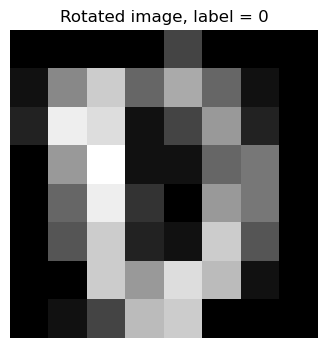

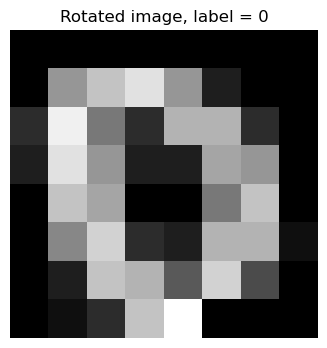

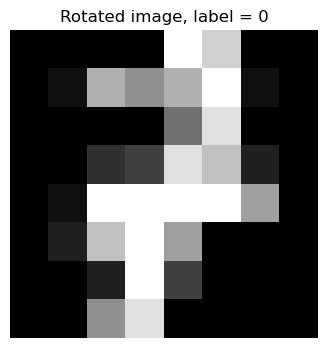

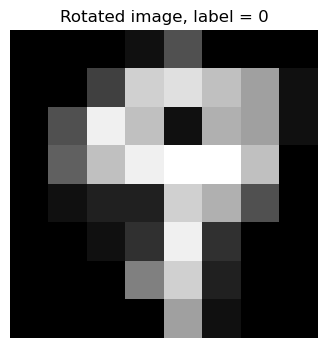

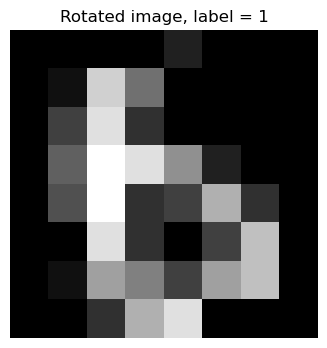

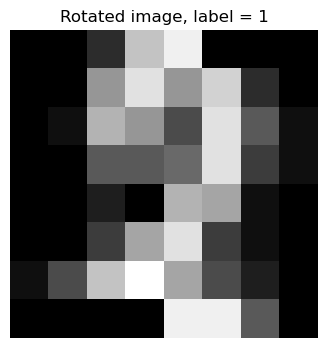

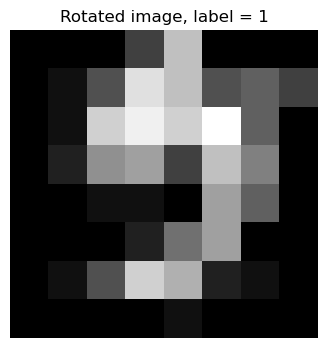

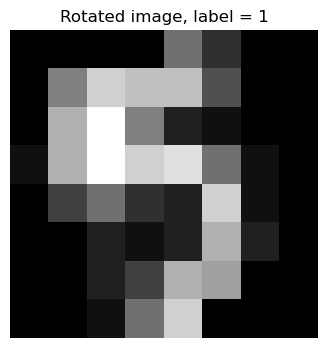

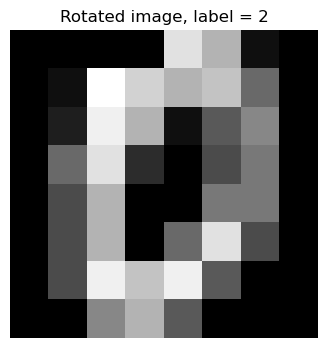

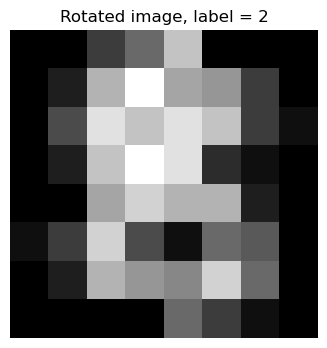

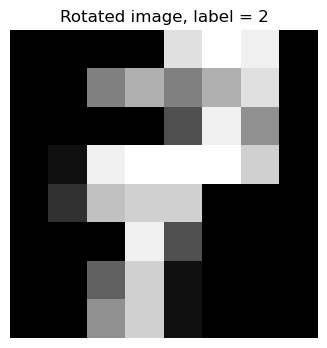

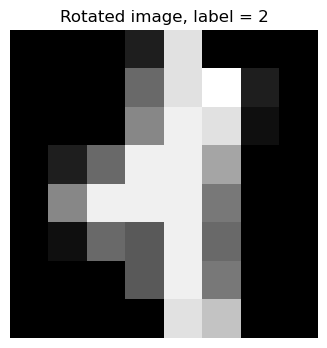

In [173]:
for index, row in Xaugmented.iterrows():
    # Visualize the first few images (optional)
    if index < 12:  # Visualize only the first 6 images
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 2)
        plt.title(f"Rotated image, label = {Yaugmented['label'][index]}")
        plt.imshow(row.values.reshape(8,8), cmap='gray')
        plt.axis('off')

        plt.show()

In [174]:
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

In [175]:
svm_model_aug = SVC(kernel='rbf', random_state=42)

svm_model_aug.fit(X_aug_train, y_aug_train)

SVC(random_state=42)

In [176]:
svm_model_aug.predict(X_aug_test[0].reshape(1, -1))

array([7])

In [177]:
y_pred_aug = svm_model_aug.predict(X_aug_test)

print("Accuracy:", accuracy_score(y_aug_test, y_pred_aug))
print("Classification Report:\n", classification_report(y_aug_test, y_pred_aug))

Accuracy: 0.9777580071174378
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.93      1.00      0.96       102
           2       1.00      0.99      1.00       107
           3       0.98      0.97      0.98       118
           4       0.98      0.97      0.98       117
           5       0.94      0.96      0.95        97
           6       0.99      0.98      0.99       123
           7       0.99      0.98      0.99       124
           8       0.98      0.97      0.98       105
           9       0.97      0.95      0.96       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



In [178]:
angles = np.arange(0, 100, 10)

accuracies = []

for angle in angles: 
    augmented_images = []
    augmented_labels = []

    for index, row in X.iterrows():
        image = row.values.reshape(8, 8)

        random_angle = np.random.uniform(-angle, angle)

        # take the absolute value of the transformed image
        rotated_image = np.abs(rotate_image(image, angle=random_angle))
        augmented_images.append(rotated_image)
        augmented_labels.append(y['class'][index])

    X_aug = np.array(augmented_images)
    y_aug = np.array(augmented_labels)

    X_aug = X_aug.reshape(X_aug.shape[0], -1)

    X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug, y_aug, test_size=0.2, random_state=42)

    svm_model_aug = SVC(kernel='rbf', random_state=42)
    svm_model_aug.fit(X_aug_train, y_aug_train)

    y_pred_aug = svm_model_aug.predict(X_aug_test)

    accuracy = accuracy_score(y_aug_test, y_pred_aug)
    accuracies.append(accuracy)
    print(f"Accuracy for angle {angle}:", accuracy_score(y_aug_test, y_pred_aug))

NameError: name 'ANGLE' is not defined

# Selecting and Training the Ensemble Model

## Voting Classifier

In [193]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_logreg = LogisticRegression()
clf_nb = GaussianNB()
clf_tree = DecisionTreeClassifier(random_state=42)
clf_svc = SVC()

clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('nb', clf_nb), ('dt', clf_tree), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard.fit(X_train, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier(estimators=[('lr', LogisticRegression()), ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC())])

In [194]:
def compare_classifiers_accuracies(clfs: list[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))

In [195]:
compare_classifiers_accuracies([clf_logreg, clf_nb, clf_tree, clf_svc, clf_voting_hard], X_train, X_test, y_train, y_test)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression: 0.9688612099644128
GaussianNB: 0.7188612099644128
DecisionTreeClassifier: 0.900355871886121
SVC: 0.9893238434163701


/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


VotingClassifier: 0.9777580071174378


I seems that the Gaussian Naive Bayes is the worst model between the four. The decision tree classifier is somewhat comparable to the SVM and Logistic Regression, however the last two are clearly better, with the SVM being on top.

Trying to remove the Naive Bayes from the voting classifier:

In [200]:
clf_voting_hard_wiout_NB = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard_wiout_NB.fit(X_train, y_train)

accuracy_score(y_test, clf_voting_hard_wiout_NB.predict(X_test))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9768683274021353

In [202]:
clf_voting_hard_logistic_svm = VotingClassifier(
    estimators=[('lr', clf_logreg), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard_logistic_svm.fit(X_train, y_train)

accuracy_score(y_test, clf_voting_hard_logistic_svm.predict(X_test))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9786476868327402

## Bagging Classifier
TODO: see what this is and think if to include or not.

In [125]:
from sklearn.ensemble import BaggingClassifier

clf_bagging = BaggingClassifier(
    estimator=SVC(),
    n_estimators=100,
    max_samples=int(len(X_train)*0.50),
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

clf_bagging.fit(X_train, y_train)


/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=SVC(), max_samples=2248, n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [126]:
accuracy_score(y_test, clf_bagging.predict(X_test))

0.9830960854092526

In [127]:
svm = SVC()
svm.fit(X_train, y_train)

accuracy_score(y_test, svm.predict(X_test))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9893238434163701